In [2335]:
import tensorflow as tf

In [2336]:
# cd /content/drive/My Drive/PR_project

In [2337]:
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import copy
import matplotlib.pyplot as plt
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [2338]:
X = np.load('./segmentedImages_grayScale_400x400.npy')
y = np.load('./labels_700_Images.npy')

imgSize = 32

X1 = []
for i in X:
    i = cv2.resize(np.asarray(i.astype(np.float32)),(imgSize,imgSize))
    X1.append(np.asarray(i.astype(np.float32)))

X1 = np.asarray(X1)

In [2339]:
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=50)

In [2340]:
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [2341]:
x_train, x_test = x_train / 1.0, x_test / 1.0

In [2342]:
temp = np.asarray([ x_train[i].reshape(x_train[i].shape[0], x_train[i].shape[1], 1) for i in range(len(x_train))])
x_train = copy.deepcopy(temp)
temp1 = np.asarray([y_train[i].reshape(1) for i in range(len(y_train))])
y_train = copy.deepcopy(temp1)

tmp = np.asarray([ x_test[i].reshape(x_test[i].shape[0], x_test[i].shape[1], 1) for i in range(len(x_test))])
x_test = copy.deepcopy(tmp)
tmp1 = np.asarray([y_test[i].reshape(1) for i in range(len(y_test))])
y_test = copy.deepcopy(tmp1)


In [2343]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,kernel_size=3,strides=1,padding="same", activation='relu', input_shape=(imgSize, imgSize, 1)),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(32,kernel_size=3,strides=1,padding="same", activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Conv2D(64,kernel_size=3,strides=1,padding="same", activation='relu'),
  tf.keras.layers.AveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='selu', kernel_initializer='lecun_normal'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='selu', kernel_initializer='lecun_normal')
])

In [2344]:
model.summary()

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_289 (Conv2D)          (None, 32, 32, 16)        160       
_________________________________________________________________
average_pooling2d_243 (Avera (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_290 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
average_pooling2d_244 (Avera (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_291 (Conv2D)          (None, 8, 8, 64)          18496     
_________________________________________________________________
average_pooling2d_245 (Avera (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_97 (Flatten)         (None, 1024)            

In [2345]:
len(model.layers)

10

In [2346]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [2347]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [2348]:
# x_valid.shape

In [2349]:
history = model.fit(x_train,
                    y_train,
                    epochs = 50,
                    batch_size = 4,
                    validation_split = 0.1,
                    validation_freq = 2,
                    verbose=2
                )

Epoch 1/50
126/126 - 0s - loss: 1.7427 - accuracy: 0.3591
Epoch 2/50
126/126 - 0s - loss: 0.4876 - accuracy: 0.8571 - val_loss: 0.1962 - val_accuracy: 0.9464
Epoch 3/50
126/126 - 0s - loss: 0.2064 - accuracy: 0.9464
Epoch 4/50
126/126 - 0s - loss: 0.1487 - accuracy: 0.9623 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 5/50
126/126 - 0s - loss: 0.0965 - accuracy: 0.9683
Epoch 6/50
126/126 - 0s - loss: 0.0716 - accuracy: 0.9782 - val_loss: 0.0880 - val_accuracy: 0.9286
Epoch 7/50
126/126 - 0s - loss: 0.0510 - accuracy: 0.9821
Epoch 8/50
126/126 - 0s - loss: 0.0424 - accuracy: 0.9841 - val_loss: 0.0343 - val_accuracy: 0.9821
Epoch 9/50
126/126 - 0s - loss: 0.0745 - accuracy: 0.9782
Epoch 10/50
126/126 - 0s - loss: 0.0299 - accuracy: 0.9921 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 11/50
126/126 - 0s - loss: 0.0269 - accuracy: 0.9901
Epoch 12/50
126/126 - 0s - loss: 0.0985 - accuracy: 0.9643 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 13/50
126/126 - 0s - loss: 0.0250 - accurac

In [2350]:
# testing
model.evaluate(x_test, y_test, verbose=2)

5/5 - 0s - loss: 0.0014 - accuracy: 1.0000


[0.0014179656282067299, 1.0]

In [2351]:
predicted = model.predict(x_test, verbose=2)

5/5 - 0s


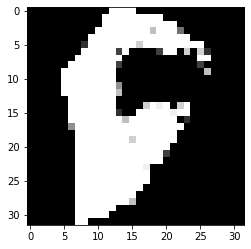

In [2352]:
plt.imshow(x_test[0].reshape(x_test[1].shape[0], x_test[0].shape[1]), cmap='gray')

In [2353]:
predicted[0]

array([40.270424 , -1.7580991, -1.7580993, -1.7364782,  7.9463844,
       13.24315  , -1.7567273, -1.7580976, -1.7580872, -1.5455166],
      dtype=float32)

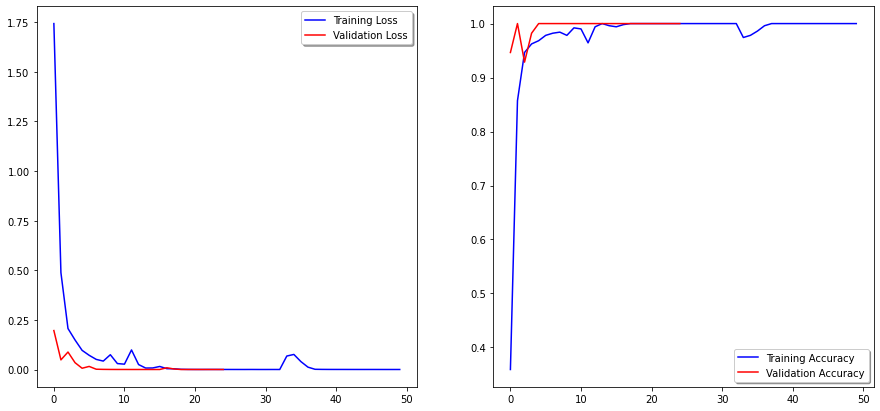

In [2354]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)


In [2355]:
# len(model.layers)

In [2356]:
# tf.keras.models.save_model(model, './trainedModels/segmentedInput/')

# tf.keras.models.save_model(model, './trainedModels/unsegmentedInput/')

In [2357]:
# mm = tf.keras.models.load_model('./trainedModels/unsegmentedInput/')

In [2358]:
# probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax()])

In [2359]:
# probability_model(x_test[:5])